In [3]:
from maxpy import utils
import numpy as np
import matplotlib.pyplot as plt
import thucyd

# Ridge extraction

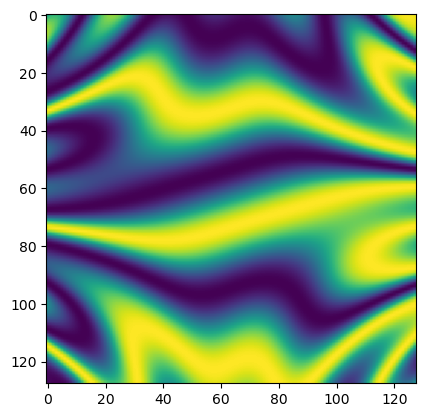

In [4]:
size = 128
lin = np.linspace(-1,1,size)
x,y = np.meshgrid(lin, lin, indexing="ij")

z = np.sin(10*np.sin(x)+3*np.sin(np.cos(10*x*y)*y))+100
plt.imshow(z)

False


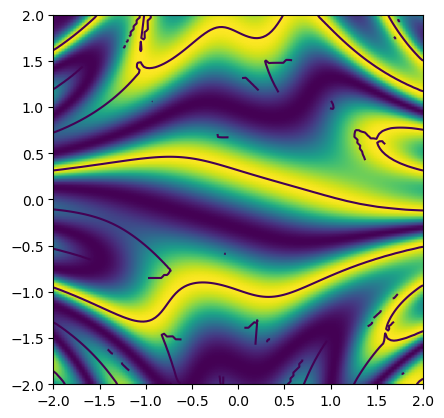

In [12]:
gradx, grady = np.gradient(z, lin, lin)
gradient = np.array([gradx, grady])

hessxx, hessxy = np.gradient(gradx, lin, lin)
hessyx, hessyy = np.gradient(grady, lin, lin)

Hessian = np.array([[hessxx, hessxy],[hessyx, hessyy]])

ridges = np.zeros((size,size))

mask = np.zeros(ridges.shape)

for i in range(size):
    for j in range(size):
        eigenvals, eigenvecs = np.linalg.eig(Hessian[:,:,i,j])
        Vor, Eor, sign_flip_vector, theta_matrix, sort_indices = thucyd.eigen.orient_eigenvectors(eigenvecs, np.diag(eigenvals))
        # if eigenvals[0] < eigenvals[1]:
        #     eigenvec = eigenvecs[:,1]
        # else:
        #     eigenvec = eigenvecs[:,0]
        ridges[i,j] = gradient[:,i,j]@Vor[:,0]
        mask[i,j] = 0 if Eor[0,0] < 0 else 1

        # if np.abs(np.sum(Hessian[:,:,i,j])) < 10:#np.sum(np.linalg.norm(eigenvecs, axis=1)) < 0:
        #     ridges[i,j] = -100
        #ridges[i,j] = np.linalg.det(np.array([gradient[:,i,j], Hessian[:,:,i,j]@gradient[:,i,j]]).T)


#plt.streamplot(y, x,grady, gradx)
ridge = np.zeros((size, size))
ridge[np.where(ridges > 0.1)] = 1
ridge[np.where(ridges < -0.1)] = 1

print(np.allclose(ridges, 0))

#plt.imshow(ridge, extent=[-2,2,-2,2])
plt.imshow(z, origin='lower', extent=[-2,2,-2,2])
# from skimage import measure
# contours = measure.find_contours(ridges, 0)

plt.contour(np.ma.array(ridges, mask=mask), levels=[0], extent=[-2,2,-2,2])
#plt.streamplot(y, x,eigenvecs[1,1], eigenvecs[0,0])
#plt.imshow(ridges, extent=[-2,2,-2,2])
# Display the image and plot all contours found
# fig, ax = plt.subplots()
# import cmasher 

# plt.imshow(z, cmap = plt.get_cmap('cmr.wildfire'))
# plt.colorbar()
# d = np.ma.array(d, mask=d < .2)
# for contour in contours:

#     ax.plot(contour[:, 1], contour[:, 0], linewidth=2)#, color=)

# ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()

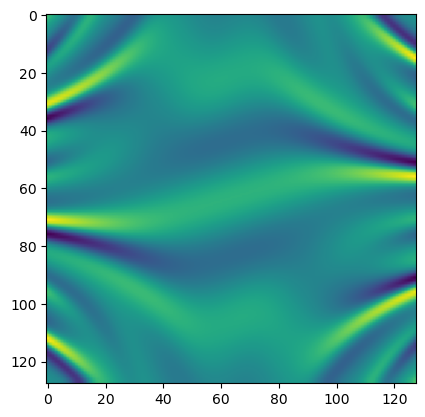

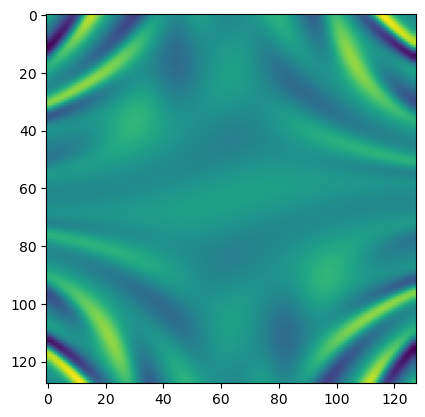

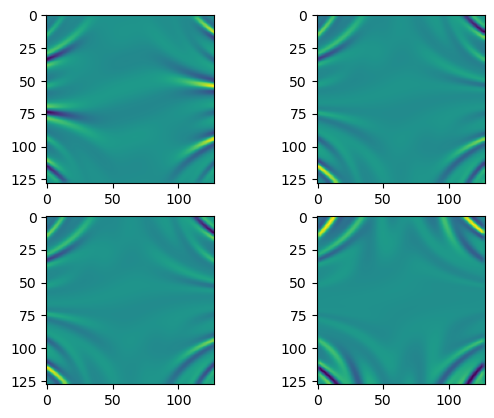

In [ ]:
plt.imshow(gradx)
plt.show()
plt.imshow(grady)
fig,ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(Hessian[i,j])
plt.show()

In [ ]:
import pyvista as pv

t = np.linspace(0,2*np.pi,20)
z = np.array([np.cos(t), np.sin(t), t])

lines = pv.lines_from_points(z.T)
tube = lines.tube(radius=0.05)
tube.plot()

In [ ]:
# Create spline with 1000 interpolation points
spline = pv.Spline(z.T, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.1)
tube.plot(smooth_shading=True)


In [ ]:
import os
import numpy
import pyvista as pv

xrng = np.arange(-10, 10, 1, dtype=np.float32)
yrng = np.arange(-10, 10, 1, dtype=np.float32)
zrng = np.arange(-10, 10, 1, dtype=np.float32)

x, y, z = np.meshgrid(xrng, yrng, zrng, indexing='ij')

u = x**2+y**2+z**2

grid = numpyToVtkUnstructuredGrid(u,x,y,z,plot=True,save=True)

In [ ]:
from skimage import measure
import cmasher 

def center_of_mass(x,y):
    u = np.array([x,y])
    return u.mean(axis=1)#/u.shape[1]

core_points = []
for i in range(result.shape[2]):
    img = result[:,:,i]

    values = np.linspace(img.min(), img.max(), 5)
    print(values.min())

    contours = measure.find_contours(img, values[-2]-(values[-2]-values[-1])*0.8,)#, values[1]-(values[1]-values[0])*0.8,)
    fig, ax = plt.subplots()

    print(len(contours))
    plt.imshow(img, cmap = plt.get_cmap('cmr.wildfire'))
    plt.colorbar()

    cores = []
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)#, color=)
        CoM = center_of_mass(contour[:, 1], contour[:, 0])
        print(CoM)
        ax.plot(CoM[0], CoM[1], "o", color="black")
        cores.append(CoM)
    core_points.append(cores)
    ax.axis('image')
    plt.show()